In [1]:
def dividir(answerAll=42):
    np.random.seed(answerAll)

    data_set = pd.read_csv('data/TRN',sep='\t')
    data_set.drop_duplicates(inplace=True)  # Remove exemplos repetidos

    # Também convertemos os dados para arrays ao invés de DataFrames
    # X = data_set.iloc[:, :-3].values
    # y = data_set.iloc[:, -1].values

    # Separando features e target para criação do modelo
    X = data_set.drop(['INDEX', 'IND_BOM_1_1', 'IND_BOM_1_2'], axis=1)
    y = data_set['IND_BOM_1_1']

 
    # Treino: 50%, Validação: 25%, Teste: 25%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, 
                                                        random_state=answerAll, stratify=y)
    #X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/3, 
    #                                                 random_state=answerAll, stratify=y_train)

    # train_test_split(y, shuffle=False)

    # X_resampled, y_resampled = SMOTE(kind='borderline1').fit_sample(X_train, y_train)
    

    ros = RandomOverSampler(random_state=answerAll)
    X_resampled, y_resampled = ros.fit_sample(X_train, y_train)

    return (X_resampled, y_resampled, X_test, y_test)

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.externals import joblib
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

import os.path as path
import numpy as np
import pandas as pd
import timeit

answerAll = 42
start = timeit.default_timer()
X_train, y_train, X_test, y_test = dividir(answerAll)

In [3]:
from sklearn.externals import joblib

classifier = joblib.load("log/Gradient_Boosting_3_1.pkl") 

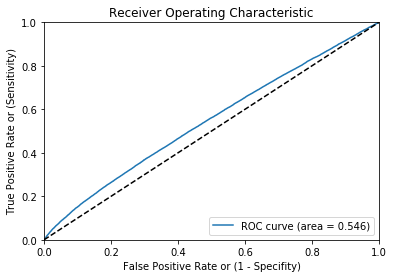

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

pred_class = classifier.predict(    X_test    )
pred_scores = classifier.predict_proba(    X_test       )[:, 1]

fpr, tpr, thresholds = roc_curve(    y_test    , pred_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()